In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import numpy as np
from tslearn.metrics import dtw
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, average, complete
from scipy.stats import spearmanr
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean
import networkx as nx

# 1. Loading in the Data and Basic Analysis

## 1.1 Data Preprocessing

Load in the ETF return data and index return data

In [2]:
ETF_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-ETFRetNEWERdates.csv", index_col=0)

#Index_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-index_data.csv",index_col=0)

Mutual_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-MutualFundRet.csv",index_col=0)

In [3]:
ETF_data.tail()

ANGL       AOA       AOK       AOM       AOR      ASHR  \
2020-04-01  0.039342 -0.009836  0.003925  0.000295 -0.004023 -0.036260   
2020-04-08  0.047920  0.082964  0.040419  0.048054  0.062843  0.061844   
2020-04-15  0.051029  0.001320  0.005950  0.003265  0.002997 -0.014426   
2020-04-22 -0.014878  0.014925  0.007998  0.012831  0.014134  0.028546   
2020-04-29  0.009073  0.039640  0.012736  0.017445  0.027940  0.010378   

                 BAB       BBH       BIL       BIV  ...       XLY       XME  \
2020-04-01  0.003270  0.026008 -0.007661  0.008965  ... -0.045369 -0.033749   
2020-04-08  0.038214  0.095140  0.009623  0.014833  ...  0.129365  0.111403   
2020-04-15  0.024061  0.019808 -0.004752  0.015044  ...  0.029439  0.010119   
2020-04-22  0.015500  0.075722  0.007998  0.005898  ...  0.026783  0.018842   
2020-04-29 -0.002526  0.004532 -0.004828 -0.001331  ...  0.057661  0.127985   

                XMLV       XOP       XPH       XRT       XSD      XSLV  \
2020-04-01  0.005904 -0.101279  0.014548 -0.080613 -0.045740 -0.005204   
2020-04-08  0.122347  0.343638  0.093997  0.166562  0.158091  0.096242   
2020-04-15 -0.019038 -0.028850  0.020767  0.016456  0.004551 -0.023244   
2020-04-22 -0.014022  0.121053  0.026635  0.015008  0.022715 -0.012624   
2020-04-29  0.079991  0.193138  0.084604  0.133365  0.105155  0.142650   

                 XTN      ZROZ  
2020-04-01 -0.087854  0.029114  
2020-04-08  0.117873  0.000741  
2020-04-15 -0.016637  0.021388  
2020-04-22 -0.012983  0.024358  
2020-04-29  0.131322 -0.011338  

[5 rows x 537 columns]

In [4]:
Index_data.tail(5)

AsiaSMALL LoBO  AsiaME1 BO2  AsiaME1 BO3  AsiaME1 BO4  \
                                                                    
2019-12-04       -0.013340    -0.003252     0.003539    -0.011960   
2019-12-11       -0.008032     0.002023    -0.009880     0.003412   
2019-12-18        0.012140     0.015043     0.016649     0.017383   
2019-12-25        0.008918     0.013354     0.014367     0.000291   
2020-01-01        0.011569     0.005836    -0.002144     0.009836   

            AsiaSMALL HiBO  AsiaME2 BO1  AsiaME2 BO2  AsiaME2 BO3  \
                                                                    
2019-12-04       -0.010497    -0.019356     0.002167    -0.017582   
2019-12-11        0.004531    -0.005038    -0.001529     0.009644   
2019-12-18        0.005285     0.010156     0.018426     0.021130   
2019-12-25        0.014436     0.006811     0.014440     0.017171   
2020-01-01        0.004933     0.013756     0.002525     0.000334   

            AsiaME2 BO4  AsiaME2 BO5  ...     Insur     RlEst     Fin    \
                                      ...                                 
2019-12-04    -0.005644    -0.009438  ... -0.023567 -0.014306 -0.018952   
2019-12-11    -0.002048    -0.000963  ... -0.000262  0.009499  0.002612   
2019-12-18     0.018428     0.022175  ...  0.027315  0.019196  0.010113   
2019-12-25     0.014573     0.015373  ...  0.004890  0.010268  0.005190   
2020-01-01     0.004925     0.004526  ... -0.008795 -0.004644 -0.011985   

               Other  LEATTREU Index  LET1TREU Index  LET3TREU Index  \
                                                                       
2019-12-04 -0.021241             NaN             NaN             NaN   
2019-12-11  0.010527             NaN             NaN             NaN   
2019-12-18  0.008595             NaN             NaN             NaN   
2019-12-25  0.009818             NaN             NaN             NaN   
2020-01-01 -0.008804             NaN             NaN             NaN   

            LET5TREU Index  LET7TREU Index  LET0TREU Index  
                                                            
2019-12-04             NaN             NaN             NaN  
2019-12-11             NaN             NaN             NaN  
2019-12-18             NaN             NaN             NaN  
2019-12-25             NaN             NaN             NaN  
2020-01-01             NaN             NaN             NaN  

[5 rows x 180 columns]

The indexes are objects and we need to change them to daytime

In [4]:
ETF_data.index = pd.to_datetime(ETF_data.index, yearfirst = True)

In [5]:
Index_data.index = pd.to_datetime(Index_data.index, yearfirst=True)

NameError: name 'Index_data' is not defined

In [6]:
Mutual_data.index = pd.to_datetime(Mutual_data.index, yearfirst=True)

Now we can join the two dataframes on the index of the ETF dataframe.

In [7]:
joined = ETF_data.join(Index_data)

NameError: name 'Index_data' is not defined

In [9]:
joined = ETF_data.join(Mutual_data)

In [10]:
joined

ANGL       AOA       AOK       AOM           AOR      ASHR  \
2014-09-24  0.002812 -0.004842  0.005850  0.004202 -3.813270e-08  0.026287   
2014-10-01  0.007270 -0.012619  0.004794  0.000748 -5.233600e-03  0.003514   
2014-10-08 -0.000968 -0.001163 -0.003957 -0.003614  2.232379e-04  0.018744   
2014-10-15 -0.028931 -0.044180 -0.022106 -0.026584 -3.477765e-02 -0.025064   
2014-10-22  0.038070  0.039399  0.024269  0.028430  3.357497e-02  0.001784   
...              ...       ...       ...       ...           ...       ...   
2020-04-01  0.039342 -0.009836  0.003925  0.000295 -4.023450e-03 -0.036260   
2020-04-08  0.047920  0.082964  0.040419  0.048054  6.284270e-02  0.061844   
2020-04-15  0.051029  0.001320  0.005950  0.003265  2.997190e-03 -0.014426   
2020-04-22 -0.014878  0.014925  0.007998  0.012831  1.413391e-02  0.028546   
2020-04-29  0.009073  0.039640  0.012736  0.017445  2.793983e-02  0.010378   

                 BAB       BBH       BIL       BIV  ...  DK0060819670  \
2014-09-24  0.013656  0.038108  0.006994  0.009539  ...     -0.001411   
2014-10-01  0.023538 -0.028072  0.012553  0.022177  ...     -0.020371   
2014-10-08 -0.001835  0.003348 -0.009030 -0.000965  ...     -0.025611   
2014-10-15  0.003597 -0.078044 -0.008274  0.001016  ...     -0.047177   
2014-10-22  0.005373  0.102960  0.014983  0.009690  ...      0.035132   
...              ...       ...       ...       ...  ...           ...   
2020-04-01  0.003270  0.026008 -0.007661  0.008965  ...     -0.013611   
2020-04-08  0.038214  0.095140  0.009623  0.014833  ...      0.092650   
2020-04-15  0.024061  0.019808 -0.004752  0.015044  ...     -0.019564   
2020-04-22  0.015500  0.075722  0.007998  0.005898  ...      0.007023   
2020-04-29 -0.002526  0.004532 -0.004828 -0.001331  ...      0.079111   

            DK0010270503  DK0015919591  DK0060815843  DK0016275118  \
2014-09-24      0.003823     -0.011845     -0.009631     -0.000307   
2014-10-01      0.004570     -0.030966     -0.021478      0.000921   
2014-10-08     -0.028810     -0.027460      0.001123      0.000102   
2014-10-15     -0.046838     -0.025674     -0.034873      0.000511   
2014-10-22      0.036036      0.022725      0.027994     -0.000818   
...                  ...           ...           ...           ...   
2020-04-01      0.026084     -0.012514     -0.016505      0.008089   
2020-04-08      0.054592      0.097190      0.054221      0.000857   
2020-04-15      0.011432     -0.036308      0.012977      0.002986   
2020-04-22      0.022581      0.002689      0.035541      0.000731   
2020-04-29      0.032597      0.064225      0.030694      0.001461   

            DK0060477859  DK0060646396  DK0060825214  DK0060360824  \
2014-09-24      0.000444      0.002771      0.002886      0.003614   
2014-10-01     -0.009675     -0.011529     -0.002110     -0.005578   
2014-10-08      0.006364      0.001133     -0.018327     -0.020734   
2014-10-15     -0.007838     -0.004452     -0.030093     -0.055326   
2014-10-22      0.009874      0.007858      0.035738      0.057722   
...                  ...           ...           ...           ...   
2020-04-01      0.086825      0.008524      0.044582      0.014231   
2020-04-08     -0.009191      0.001457      0.044024      0.067358   
2020-04-15      0.052970      0.017455      0.015999      0.027037   
2020-04-22     -0.011144     -0.022150      0.012041      0.014363   
2020-04-29     -0.005687      0.001820      0.024974      0.046490   

            DK0000581083  
2014-09-24      0.001020  
2014-10-01     -0.013316  
2014-10-08     -0.007230  
2014-10-15     -0.046054  
2014-10-22      0.033081  
...                  ...  
2020-04-01      0.034905  
2020-04-08      0.034978  
2020-04-15      0.043415  
2020-04-22     -0.026021  
2020-04-29      0.045620  

[293 rows x 1094 columns]

In [11]:
joined.index.dtype

dtype('<M8[ns]')

We only have the index data until the 2019-04-10 so we need to cut the end of the dataframe.

In [12]:
enddate = "04-11-2019" 

joined = joined[joined.index < enddate]

joined.tail()

ANGL       AOA       AOK       AOM       AOR      ASHR  \
2019-03-13 -0.000617  0.006665  0.003033  0.005002  0.006041 -0.032574   
2019-03-20 -0.001074 -0.000407  0.000162  0.000214 -0.001426  0.022585   
2019-03-27  0.014981  0.008535  0.016752  0.014981  0.012026 -0.020018   
2019-04-03  0.007966  0.019795  0.004954  0.008053  0.013855  0.083112   
2019-04-10  0.004224  0.000103  0.000641  0.000528  0.000815  0.008223   

                 BAB       BBH       BIL       BIV  ...  DK0060819670  \
2019-03-13  0.004032  0.031632 -0.001123  0.004032  ...      0.004263   
2019-03-20 -0.003883 -0.012407 -0.007473 -0.001096  ...     -0.004453   
2019-03-27  0.031247 -0.020677  0.015535  0.024239  ...      0.001368   
2019-04-03 -0.010384  0.045146  0.001184 -0.005459  ...      0.023469   
2019-04-10  0.002888  0.002351 -0.002967  0.001022  ...      0.000775   

            DK0010270503  DK0015919591  DK0060815843  DK0016275118  \
2019-03-13      0.006325     -0.004204      0.006590      0.000827   
2019-03-20     -0.000700      0.021577      0.002490     -0.000700   
2019-03-27     -0.004717     -0.014878     -0.007181      0.001547   
2019-04-03      0.028419      0.012892      0.039850     -0.001446   
2019-04-10     -0.003768      0.015407      0.004907      0.000229   

            DK0060477859  DK0060646396  DK0060825214  DK0060360824  \
2019-03-13     -0.002036      0.004280      0.003327      0.006798   
2019-03-20      0.003071      0.007535      0.002614      0.010251   
2019-03-27      0.001217      0.002709      0.014912      0.004706   
2019-04-03      0.002840      0.003639      0.007703      0.031602   
2019-04-10      0.002941     -0.000469     -0.002984     -0.001650   

            DK0000581083  
2019-03-13     -0.000674  
2019-03-20      0.010852  
2019-03-27     -0.002145  
2019-04-03      0.019419  
2019-04-10      0.002902  

[5 rows x 1094 columns]

**Calculate the spearman correlation of between the indexes.**

In [13]:
corr = joined.corr(method="spearman")

In [14]:
corr

ANGL       AOA       AOK       AOM       AOR      ASHR  \
ANGL          1.000000  0.737177  0.834013  0.826299  0.792049  0.252170   
AOA           0.737177  1.000000  0.832187  0.901995  0.970197  0.442691   
AOK           0.834013  0.832187  1.000000  0.976521  0.918757  0.344805   
AOM           0.826299  0.901995  0.976521  1.000000  0.966411  0.385638   
AOR           0.792049  0.970197  0.918757  0.966411  1.000000  0.430286   
...                ...       ...       ...       ...       ...       ...   
DK0060477859  0.437229  0.396128  0.261336  0.298143  0.355507  0.152574   
DK0060646396  0.261745  0.303706  0.185453  0.211393  0.271127  0.119097   
DK0060825214  0.607173  0.715503  0.678855  0.700135  0.723956  0.246302   
DK0060360824  0.628238  0.835585  0.667075  0.731119  0.801406  0.402448   
DK0000581083  0.655537  0.868798  0.695688  0.759880  0.832273  0.411669   

                   BAB       BBH       BIL       BIV  ...  DK0060819670  \
ANGL          0.549897  0.422659  0.734459  0.661748  ...      0.628689   
AOA           0.333148  0.675840  0.561353  0.440468  ...      0.857160   
AOK           0.722359  0.556995  0.865636  0.819964  ...      0.634425   
AOM           0.637444  0.616055  0.805553  0.736059  ...      0.710784   
AOR           0.484266  0.666000  0.685250  0.589991  ...      0.806789   
...                ...       ...       ...       ...  ...           ...   
DK0060477859 -0.039928  0.271007  0.048850  0.029862  ...      0.450213   
DK0060646396 -0.027280  0.217729 -0.072203 -0.002592  ...      0.298949   
DK0060825214  0.375402  0.429545  0.506988  0.450713  ...      0.702186   
DK0060360824  0.214568  0.575098  0.415669  0.306045  ...      0.834523   
DK0000581083  0.219033  0.577869  0.444356  0.327110  ...      0.863865   

              DK0010270503  DK0015919591  DK0060815843  DK0016275118  \
ANGL              0.673750      0.430799      0.483305      0.263583   
AOA               0.828719      0.584102      0.702560      0.092064   
AOK               0.691372      0.376239      0.521643      0.254503   
AOM               0.747059      0.447918      0.592022      0.227351   
AOR               0.805003      0.524320      0.664328      0.165031   
...                    ...           ...           ...           ...   
DK0060477859      0.461581      0.501771      0.465334      0.195574   
DK0060646396      0.292953      0.543075      0.456940      0.202894   
DK0060825214      0.809633      0.454636      0.589273      0.202764   
DK0060360824      0.907252      0.561160      0.776360      0.101848   
DK0000581083      0.890786      0.598580      0.710164      0.070366   

              DK0060477859  DK0060646396  DK0060825214  DK0060360824  \
ANGL              0.437229      0.261745      0.607173      0.628238   
AOA               0.396128      0.303706      0.715503      0.835585   
AOK               0.261336      0.185453      0.678855      0.667075   
AOM               0.298143      0.211393      0.700135      0.731119   
AOR               0.355507      0.271127      0.723956      0.801406   
...                    ...           ...           ...           ...   
DK0060477859      1.000000      0.613392      0.374459      0.498852   
DK0060646396      0.613392      1.000000      0.319553      0.342402   
DK0060825214      0.374459      0.319553      1.000000      0.795044   
DK0060360824      0.498852      0.342402      0.795044      1.000000   
DK0000581083      0.497733      0.331315      0.804940      0.887563   

              DK0000581083  
ANGL              0.655537  
AOA               0.868798  
AOK               0.695688  
AOM               0.759880  
AOR               0.832273  
...                    ...  
DK0060477859      0.497733  
DK0060646396      0.331315  
DK0060825214      0.804940  
DK0060360824      0.887563  
DK0000581083      1.000000  

[1094 rows x 1094 columns]

Save the upper half diagonal of the matrix

In [15]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

In [16]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [17]:
corr = corr*mask

In [18]:
corr

ANGL       AOA       AOK       AOM       AOR      ASHR  \
ANGL           1.0  0.737177  0.834013  0.826299  0.792049  0.252170   
AOA            0.0  1.000000  0.832187  0.901995  0.970197  0.442691   
AOK            0.0  0.000000  1.000000  0.976521  0.918757  0.344805   
AOM            0.0  0.000000  0.000000  1.000000  0.966411  0.385638   
AOR            0.0  0.000000  0.000000  0.000000  1.000000  0.430286   
...            ...       ...       ...       ...       ...       ...   
DK0060477859   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
DK0060646396   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
DK0060825214   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
DK0060360824   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
DK0000581083   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                   BAB       BBH       BIL       BIV  ...  DK0060819670  \
ANGL          0.549897  0.422659  0.734459  0.661748  ...      0.628689   
AOA           0.333148  0.675840  0.561353  0.440468  ...      0.857160   
AOK           0.722359  0.556995  0.865636  0.819964  ...      0.634425   
AOM           0.637444  0.616055  0.805553  0.736059  ...      0.710784   
AOR           0.484266  0.666000  0.685250  0.589991  ...      0.806789   
...                ...       ...       ...       ...  ...           ...   
DK0060477859 -0.000000  0.000000  0.000000  0.000000  ...      0.000000   
DK0060646396 -0.000000  0.000000 -0.000000 -0.000000  ...      0.000000   
DK0060825214  0.000000  0.000000  0.000000  0.000000  ...      0.000000   
DK0060360824  0.000000  0.000000  0.000000  0.000000  ...      0.000000   
DK0000581083  0.000000  0.000000  0.000000  0.000000  ...      0.000000   

              DK0010270503  DK0015919591  DK0060815843  DK0016275118  \
ANGL              0.673750      0.430799      0.483305      0.263583   
AOA               0.828719      0.584102      0.702560      0.092064   
AOK               0.691372      0.376239      0.521643      0.254503   
AOM               0.747059      0.447918      0.592022      0.227351   
AOR               0.805003      0.524320      0.664328      0.165031   
...                    ...           ...           ...           ...   
DK0060477859      0.000000      0.000000      0.000000      0.000000   
DK0060646396      0.000000      0.000000      0.000000      0.000000   
DK0060825214      0.000000      0.000000      0.000000      0.000000   
DK0060360824      0.000000      0.000000      0.000000      0.000000   
DK0000581083      0.000000      0.000000      0.000000      0.000000   

              DK0060477859  DK0060646396  DK0060825214  DK0060360824  \
ANGL              0.437229      0.261745      0.607173      0.628238   
AOA               0.396128      0.303706      0.715503      0.835585   
AOK               0.261336      0.185453      0.678855      0.667075   
AOM               0.298143      0.211393      0.700135      0.731119   
AOR               0.355507      0.271127      0.723956      0.801406   
...                    ...           ...           ...           ...   
DK0060477859      1.000000      0.613392      0.374459      0.498852   
DK0060646396      0.000000      1.000000      0.319553      0.342402   
DK0060825214      0.000000      0.000000      1.000000      0.795044   
DK0060360824      0.000000      0.000000      0.000000      1.000000   
DK0000581083      0.000000      0.000000      0.000000      0.000000   

              DK0000581083  
ANGL              0.655537  
AOA               0.868798  
AOK               0.695688  
AOM               0.759880  
AOR               0.832273  
...                    ...  
DK0060477859      0.497733  
DK0060646396      0.331315  
DK0060825214      0.804940  
DK0060360824      0.887563  
DK0000581083      1.000000  

[1094 rows x 1094 columns]

Use the corr matrix to create the links

In [19]:
links = corr.stack().reset_index()


Drop all 0 rows from the matrix.

In [20]:
links = links.replace(0, np.nan)
links = links.dropna(how='any', axis=0)
#df = df.replace(np.nan, 0)

In [21]:
links

level_0       level_1         0
0                ANGL          ANGL  1.000000
1                ANGL           AOA  0.737177
2                ANGL           AOK  0.834013
3                ANGL           AOM  0.826299
4                ANGL           AOR  0.792049
...               ...           ...       ...
1194646  DK0060825214  DK0060360824  0.795044
1194647  DK0060825214  DK0000581083  0.804940
1195740  DK0060360824  DK0060360824  1.000000
1195741  DK0060360824  DK0000581083  0.887563
1196835  DK0000581083  DK0000581083  1.000000

[598965 rows x 3 columns]

Rename the columns

In [22]:
links.columns=["var1", "var2", "value"]

Filter out self correlation links and only keep links where the correlation is larger than 0.5

In [23]:
links_filtered=links.loc[(links["value"]>0.5) & (links["var1"] != links["var2"])]
#links_filtered=links.loc[links["var1"] != links["var2"]]
links_filtered

var1          var2     value
1                ANGL           AOA  0.737177
2                ANGL           AOK  0.834013
3                ANGL           AOM  0.826299
4                ANGL           AOR  0.792049
6                ANGL           BAB  0.549897
...               ...           ...       ...
1190271  DK0060815843  DK0000581083  0.710164
1192456  DK0060477859  DK0060646396  0.613392
1194646  DK0060825214  DK0060360824  0.795044
1194647  DK0060825214  DK0000581083  0.804940
1195741  DK0060360824  DK0000581083  0.887563

[262017 rows x 3 columns]

https://julian-west.github.io/blog/visualising-asset-price-correlations/

**Create a graph were only correlation higher than 0.5 creates links (both negative and positive).**

Add the notes and then add the weighted edges

In [24]:
G = nx.Graph()

for i in range(len(corr)):
    G.add_node(corr.index[i])
    

In [25]:
tuples = list(links_filtered.itertuples(index=False,name=None))
G.add_weighted_edges_from(tuples)


In [26]:
G.number_of_edges()

262017

**Now we want to want to assign color, thichness and nodesize to plot the graph.**

Begin by reading in the cluster data, since we want to color the ETFs blue and indexes red.

In [27]:
# Here we define classes so we can color the index points in red and the ETF points in blue
classes = np.empty(joined.shape[1])

for i in range(0, joined.shape[1]):
    if i in range(0,ETF_data.shape[1]):
        classes[i] = 1
#    elif i in range(ETF_data.shape[1],ETF_data.shape[1]+180):
#        classes[i] = 2
    else:
        classes[i] = 3

def assign_node_color(classno, assetclass):
    if classno == 1:
        if assetclass == "Equity":
            return "blue" #red
        elif assetclass == "Fixed Income":
            return "cornflowerblue"
        elif assetclass == "Asset Allocation":
            return "lightsteelblue"
        elif assetclass == "Commodities":
            return "slateblue"
        else:
            return "lightsteelblue"
    else:
        if assetclass == "Industry Portfolios":
            return "tomato" 
        elif assetclass == "Market Portfolios":
            return "lightcoral"
        else:
            return "darkred"

In [31]:
def assign_node_color(classno):
    if classno == 1:
        return "royalblue" 
    elif classno == 2:
        return "tomato" 
    else:
        return "seagreen"

def assign_colour(correlation):
    if correlation <= 0.75:
        return "#8eb7a4"  # dark green
    else:
        return "#cee5db"  # light green

def assign_thickness(correlation, benchmark_thickness=1, scaling_factor=1):
    return benchmark_thickness * abs(correlation)**scaling_factor

def assign_node_size(degree, scaling_factor=20):
    return degree * scaling_factor


# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for i in range(len(links_filtered)):
    edge_colours.append(assign_colour(links_filtered.iloc[i]["value"]))
    edge_width.append(assign_thickness(links_filtered.iloc[i]["value"]))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(G.degree).items():
    node_size.append(max(2000,assign_node_size(value))/10)
        
    
node_color = []
for i in range(len(classes)):
    node_color.append(assign_node_color(classes[i]))

And plot the network.
- Only links where the correlation is higher than 0.5 is shown.
- Here the edges are ligtgreen if their correlation is 0.5-0.75, higher darkblue.
- The nodes are sizes after their degree, but the nodes from the blue and green cluster have a minimum size of 10 to make them clearly visible.

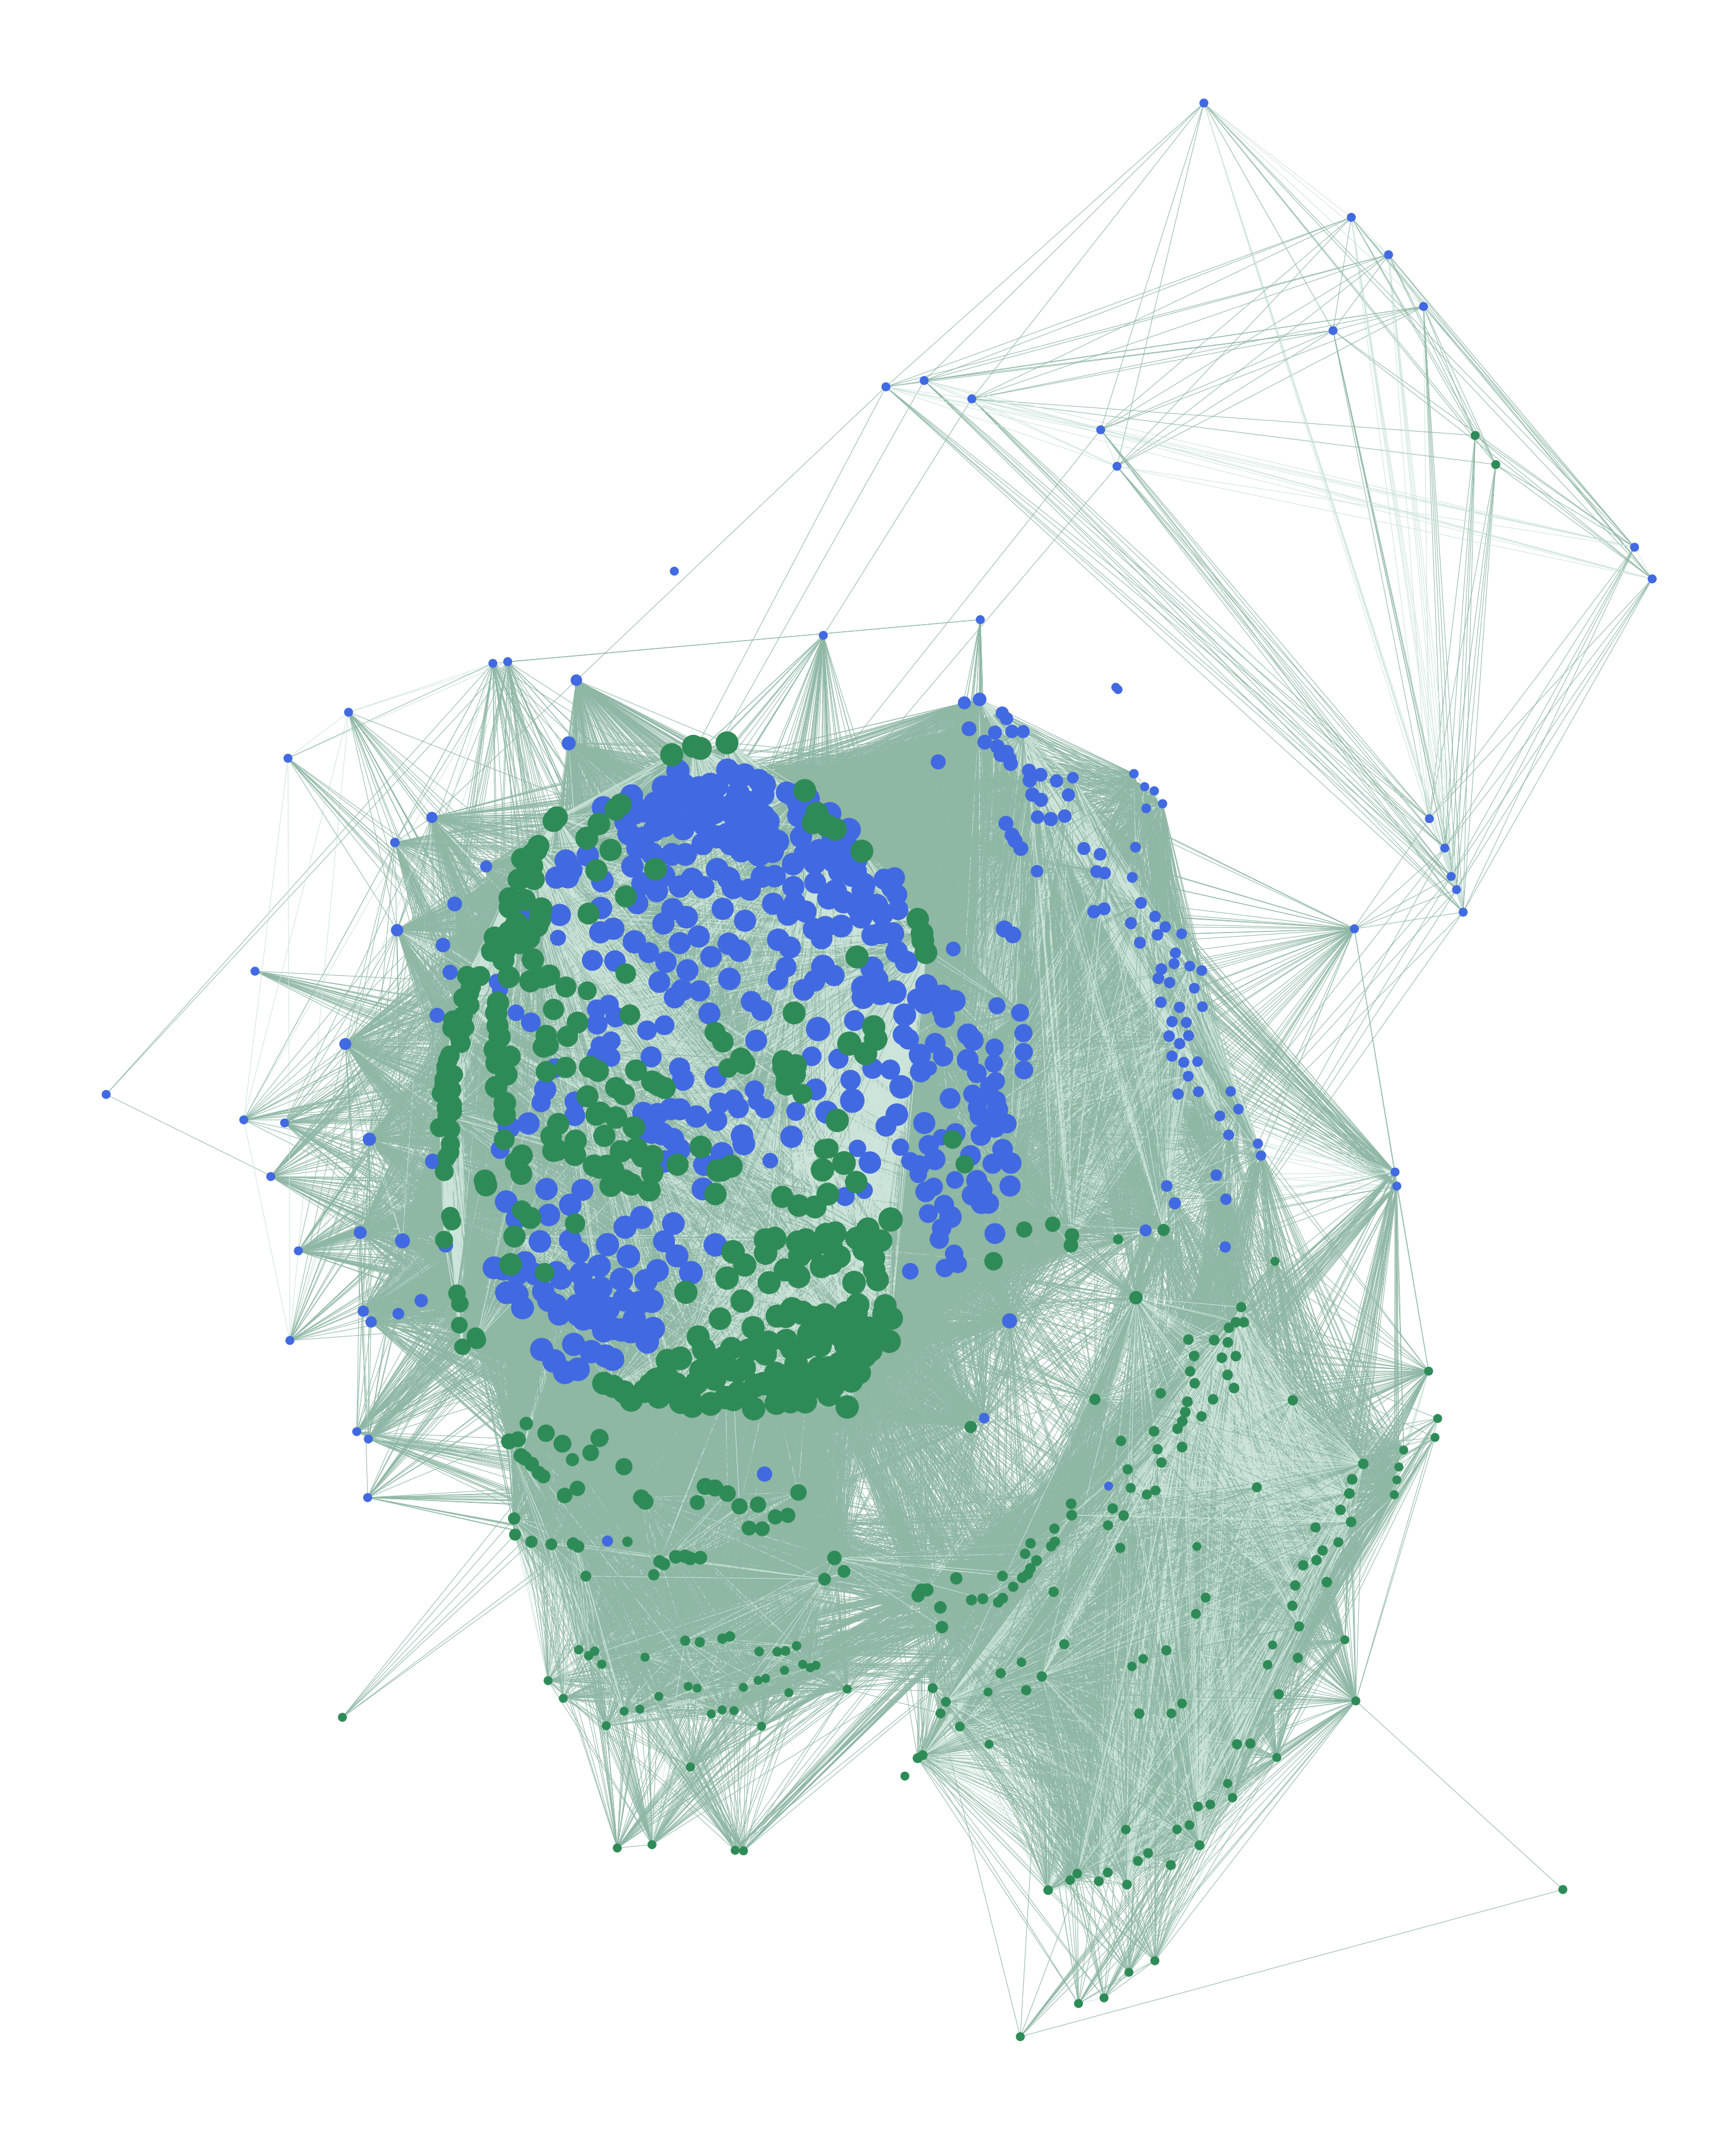

In [32]:
plt.figure(figsize=(40,50))
nx.draw_kamada_kawai(G, with_labels = False, font_size = 17, node_color = node_color, node_size = node_size, edge_color=edge_colours, alpha = 1)
ax = plt.gca()
#plt.savefig("NetworkIndexes.png", dpi=300, bbox_inches='tight')
plt.show()
